In [17]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# Fetch historical IV data from Deribit API
def fetch_iv_history(start_date, end_date):
    """
    Fetch historical implied volatility data for BTC options from Deribit.
    """
    # Convert dates to Unix timestamps (milliseconds)
    start_timestamp = int(datetime.strptime(start_date, "%Y-%m-%d").timestamp() * 1000)
    end_timestamp = int(datetime.strptime(end_date, "%Y-%m-%d").timestamp() * 1000)
    
    # API URL for historical volatility
    url = "https://www.deribit.com/api/v2/public/get_historical_volatility"
    response = requests.get(url, params={"currency": "BTC", "start_timestamp": start_timestamp, "end_timestamp": end_timestamp})
    
    if response.status_code == 200:
        data = response.json()
        print("Raw API Response:", data)  # Debugging step: Print the raw API response
        if 'result' in data:
            result = data['result']
            if isinstance(result, list):
                return result  # Return the raw result for inspection
            else:
                print("Error: 'result' is not a list")
                return None
        else:
            print("Error: 'result' key not found in API response")
            return None
    else:
        print(f"Error: {response.status_code}")
        return None

# Define the time range (last 3 months)
end_date = datetime.today().strftime("%Y-%m-%d")
start_date = (datetime.today() - timedelta(days=90)).strftime("%Y-%m-%d")

# Fetch data
iv_data = fetch_iv_history(start_date, end_date)

if iv_data is not None:
    # Inspect the data structure
    print(iv_data)
else:
    print("Failed to fetch historical data.")


Raw API Response: {'jsonrpc': '2.0', 'result': [[1731229200000, 46.86443837878527], [1731229200000, 46.86443837878527], [1731232800000, 46.88951566898803], [1731236400000, 46.91506153731827], [1731240000000, 46.92790730156599], [1731243600000, 46.96647117548478], [1731247200000, 46.97857621959002], [1731250800000, 46.9724175234113], [1731254400000, 46.98500589424412], [1731258000000, 46.99376566974936], [1731261600000, 46.99191686080867], [1731265200000, 47.133531368603016], [1731268800000, 47.14550404990018], [1731272400000, 47.40189976540572], [1731276000000, 47.65854643505856], [1731279600000, 48.01283092544667], [1731283200000, 48.22220887249339], [1731286800000, 48.24385432002325], [1731290400000, 48.25303596456558], [1731294000000, 48.415103737176686], [1731297600000, 48.43544935834977], [1731301200000, 48.42438561736398], [1731304800000, 48.42809359802339], [1731308400000, 48.63028184908699], [1731312000000, 48.641065856520626], [1731315600000, 48.66235943627439], [1731319200000

In [32]:
iv_data

[[1731229200000, 46.86443837878527],
 [1731229200000, 46.86443837878527],
 [1731232800000, 46.88951566898803],
 [1731236400000, 46.91506153731827],
 [1731240000000, 46.92790730156599],
 [1731243600000, 46.96647117548478],
 [1731247200000, 46.97857621959002],
 [1731250800000, 46.9724175234113],
 [1731254400000, 46.98500589424412],
 [1731258000000, 46.99376566974936],
 [1731261600000, 46.99191686080867],
 [1731265200000, 47.133531368603016],
 [1731268800000, 47.14550404990018],
 [1731272400000, 47.40189976540572],
 [1731276000000, 47.65854643505856],
 [1731279600000, 48.01283092544667],
 [1731283200000, 48.22220887249339],
 [1731286800000, 48.24385432002325],
 [1731290400000, 48.25303596456558],
 [1731294000000, 48.415103737176686],
 [1731297600000, 48.43544935834977],
 [1731301200000, 48.42438561736398],
 [1731304800000, 48.42809359802339],
 [1731308400000, 48.63028184908699],
 [1731312000000, 48.641065856520626],
 [1731315600000, 48.66235943627439],
 [1731319200000, 48.669726455014874]

/tmp/ipykernel_637974/70575544.py:15: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  dates = [datetime.utcfromtimestamp(item[0] / 1000) for item in data]


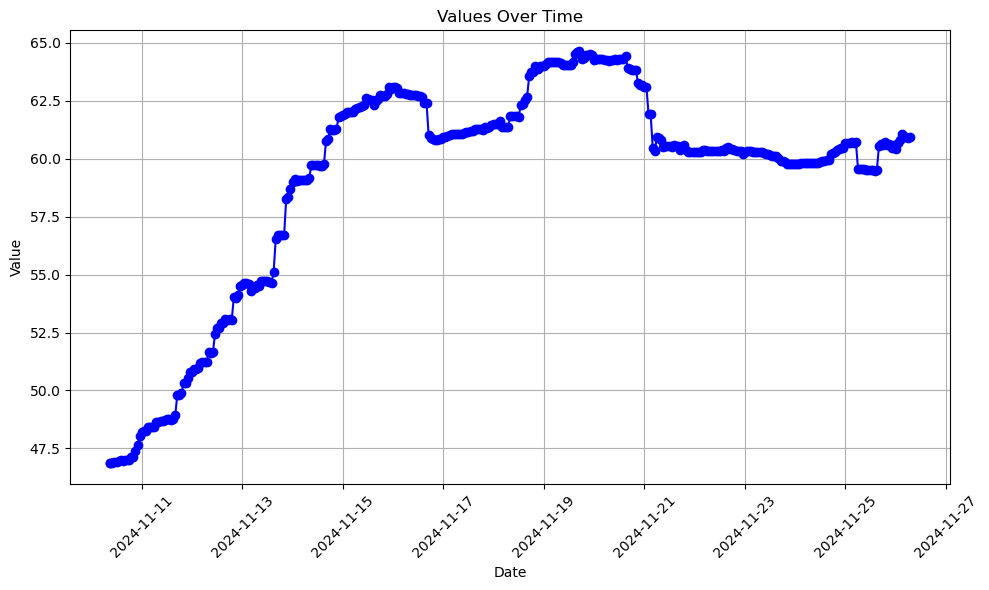

In [40]:
import matplotlib.pyplot as plt
from datetime import datetime

# Example list of lists where the first element is Unix timestamp (in milliseconds) and the second is a value
data = [
    [1732579200000, 10],
    [1732665600000, 15],
    [1732752000000, 20],
    [1732838400000, 18],
    [1732924800000, 25],
]
data = iv_data

# Convert Unix timestamps (in milliseconds) to readable dates
dates = [datetime.utcfromtimestamp(item[0] / 1000) for item in data]
values = [item[1] for item in data]

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(dates, values, marker='o', color='b', label='Values')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Values Over Time')
plt.xticks(rotation=45)  # Rotate dates for better readability
plt.grid(True)
plt.tight_layout()

# Display the plot
plt.show()
